# 2.3 Exercises

#### 1. Sampling
Suppose you are the lottery fairy in a weekly lottery, where $6$ out of $49$ *unique* numbers are drawn.

**Instructions:**
  + Draw the winning numbers for this week.

**Hints:**
  + You may use the function <tt>sample()</tt> to draw random numbers, see <tt>?sample</tt>.
  + The set of elements to be sampled from here is $\\{1,...,49\\}$.

In [1]:
import numpy as np

In [2]:
np.random.seed(seed=123)
np.random.randint(low=1, high=50, size=6)

array([46,  3, 29, 35, 39, 18])

#### 2. Probability Density Function
Consider a random variable $X$ with probability density function (PDF)

$$f_X(x)=\frac{x}{4}e^{-x^2/8},\quad x\geq 0.$$

**Instructions:**
  + Define the PDF from above as a function <tt>f()</tt>. <tt>exp(a)</tt> computes $e^a$.
  + Check whether the function you have defined is indeed a PDF.


**Hints:**
  + Use <tt>function(x) {...}</tt> to define a function which takes the argument <tt>x</tt>.
  + In order for <tt>f()</tt> to be a PDF, its integral over the whole domain has to equal 1: $\int_0^\infty f_X(x)\mathrm{d}x=1$.
  + The function <tt>integrate()</tt> performs integration. You have to specify the function to be integrated as well as lower and upper limits of integration. These may be set to $[-\infty,\infty]$ by setting the corresponding arguments to <tt>-Inf</tt> and <tt>Inf</tt>. You can access the numerical value of the computed integral by appending <tt>$value</tt>. See `?integral for a detailed description of the function.


In [3]:
import math
from scipy import integrate

def f(x):
    return x/4*math.exp(-x**2/8)

integrate.quad(f, 0, np.inf)

(1.0, 2.1730298600934144e-09)

#### 3. Expected Value and Variance
In this exercise you have to compute the expected value and the variance of the random variable $X$ considered in the previous exercise.
The PDF <tt>f()</tt> from the previous exercise is available in your working environment.

**Instructions:**
  + Define a suitable function <tt>ex()</tt> which integrates to the expected value of $X$.
  + Compute the expected value of $X$. Store the result in <tt>expected_value</tt>.
  + Define a suitable function <tt>ex2()</tt> which integrates to the expected value of $X^2$.
  + Compute the variance of $X$. Store the result in <tt>variance</tt>.

**Hints:**
  + The expected value of $X$ is defined as $E(X)=\int_0^\infty xf_X(x)dx$.
  + The value of an integral computed by <tt>integrate()</tt> can be obtained via <tt>\\$value</tt>.
  + The variance of $X$ is defined as $Var(X)=E(X^2)-E(X)^2$, where $E(X^2)=\int_0^\infty x^2f_X(x)\mathrm{d}x$.

In [4]:
# define the function ex
def ex(x):
    return x*f(x)

# compute the expected value of X
expected_value = integrate.quad(ex, 0, np.inf)[0]

# define the function ex2
def ex2(x):
    return x**2*f(x)

# compute the variance of X
variance = integrate.quad(ex2, 0, np.inf)[0] - expected_value**2

#### 4. Standard Normal Distribution I

Let $Z\sim\mathcal{N}(0, 1)$.

**Instructions:**
  + Compute $\phi(3)$, that is, the value of the standard normal density at $c=3$.


**Hints:**
  + Values of $\phi(\cdot)$ can be computed using <tt>dnorm()</tt>. Note that by default <tt>dnorm()</tt> uses <tt>mean = 0</tt> and <tt>sd = 1</tt> so there is no need to set the corresponding arguments when you wish to obtain density values of the standard normal distribution.


In [5]:
from scipy.stats import norm

norm.pdf(3)

0.0044318484119380075

#### 5. Standard Normal Distribution II

Let $Z\sim\mathcal{N}(0, 1)$.

**Instructions:**
  + Compute $P(|Z|\leq 1.64)$ by using the function <tt>pnorm()</tt>.

**Hints:**
  + $P(|Z|\leq z) = P(-z \leq Z \leq z)$.
  + Probabilities of the form $P(a \leq Z \leq b)$ can be computed as $P(Z\leq b)-P(Z\leq a)=F_Z(b)-F_Z(a)$ with $F_Z(\cdot)$ the cumulative distribution function (CDF) of $Z$. Alternatively, you may exploit the symmetry of the standard normal distribution.


In [6]:
# compute the probability
norm.cdf(1.64)-norm.cdf(-1.64)

0.8989948330517925

#### 6. Normal Distribution I

Let $Y\sim\mathcal{N}(5, 25)$.

**Instructions:**
  + Compute the 99% quantile of the given distribution, i.e., find $y$ such that $\Phi(\frac{y-5}{5})=0.99$.

**Hints:**
  + You can compute quantiles of the normal distribution by using the function <tt>qnorm()</tt>.
  + Besides the quantile to be computed you have to specify the mean and the standard deviation of the distribution. This is done via the arguments <tt>mean</tt> and <tt>sd</tt>. Note that <tt>sd</tt> sets the standard deviation, not the variance!
  + <tt>sqrt(a)</tt> returns the square root of the numeric argument <tt>a</tt>.

In [7]:
# compute the 99% quantile of a normal distribution with mu = 5 and sigma^2 = 25.
norm.ppf(0.99, 5, np.sqrt(25))

16.631739370204205

#### 7. Normal Distribution II

Let $Y\sim\mathcal{N}(2, 12)$.

**Instructions:**
  + Generate $10$ random numbers from this distribution.

**Hints:**
  + You can use <tt>rnorm()</tt> to draw random numbers from a normal distribution.
  + Besides the number of draws you have to specify the mean and the standard deviation of the distribution. This can be done via the arguments <tt>mean</tt> and <tt>sd</tt>. Note that <tt>sd</tt> requires the standard deviation, not the variance!

In [8]:
# generate 10 random numbers from the given distribution.
norm.rvs(loc=2, scale=np.sqrt(12), size=10, random_state=12)

array([ 3.63847098, -0.36052849,  2.83983505, -3.89152106,  4.60896331,
       -3.31643067,  2.01776072,  1.58351913, -0.79546723, 11.9482742 ])

#### 8. Chi-squared Distribution I

Let $W\sim\chi^2_{10}$.

**Instructions:**
  + Plot the corresponding PDF using <tt>curve()</tt>. Specify the range of x-values as $[0,25]$ via the argument <tt>xlim</tt>.

**Hints:**
  + <tt>curve()</tt> expects a function and its parameters as arguments (here <tt>dchisq()</tt> and the degrees of freedom <tt>df</tt>).
  + The range of x-values in <tt>xlim</tt> can be passed as a vector of interval bounds.


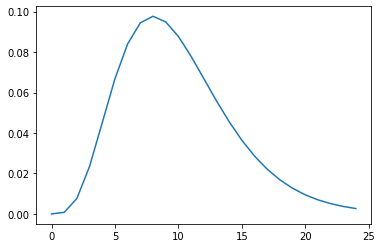

In [9]:
# plot the PDF of a chi^2 random variable with df = 10

from scipy.stats import chi2
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0, 25)
plt.plot(x, chi2.pdf(x, df=10))
plt.show()

#### 9. Chi-squared Distribution II

Let $X_1$ and $X_2$ be two independent normally distributed random variables with $\\mu=0$ and $\\sigma^2=15$.

**Instructions:**
  + Compute $P(X_1^2+X_2^2>10)$.


**Hints:**
  + Note that $X_1$ and $X_2$ are not $\\mathcal{N}(0,1)$ but $\\mathcal{N}(0,15)$ distributed. Hence you have to scale appropriately. Afterwards you can use <tt>pchisq()</tt> to compute the probability.
  + The argument <tt>lower.tail</tt> may be helpful.


In [10]:
# compute the probability

chi2.sf(10/15, df=2, loc=0, scale=1)

0.7165313105737892

#### 10. Student t Distribution I

Let $X\sim t_{10000}$ and $Z\sim\mathcal{N}(0,1)$.

**Instructions:**
  + Compute the $95\%$ quantile of both distributions. What do you notice?

**Hints:**
  + You may use <tt>qt()</tt> and <tt>qnorm()</tt> to compute quantiles of the given distributions.
  + For the $t$ distribution you have to specify the degrees of freedom <tt>df</tt>.


In [11]:
# compute the 95% quantile of a t distribution with 10000 degrees of freedom
# qt(0.95, df = 10000)
from scipy.stats import t

print(t.ppf(0.95, df = 10000))

# compute the 95% quantile of a standard normal distribution

print(norm.ppf(0.95))

# both values are very close to each other. This is not surprising as for sufficient large degrees of freedom the t distribution can be approximated by the standard normal distribution.

1.6450060180692423
1.6448536269514722


#### 11. Student t Distribution II

Let $X\sim t_1$. Once the session has initialized you will see the plot of the corresponding probability density function (PDF).

**Instructions:**
  + Generate $1000$ random numbers from this distribution and assign them to the variable <tt>x</tt>.
  + Compute the sample mean of <tt>x</tt>. Can you explain the result?

**Hints:**
  + You can use <tt>rt()</tt> to draw random numbers from a t distribution.
  + Note that the t distribution is fully determined through the degree(s) of freedom. Specify them via the argument <tt>df</tt>.
  + To compute the sample mean of a vector you can use the function <tt>mean()</tt>.


In [12]:
# generate 1000 random numbers from the given distribution. Assign them to the variable x.
x = t.rvs(df = 1, size = 1000, random_state = 1)

# compute the sample mean of x.
np.mean(x)

# Although a t distribution with M = 1 is, as every other t distribution, symmetric around zero it actually has no expectation. This explains the highly non-zero value for the sample mean.

10.845661965991818

#### 12. F Distribution I

Let $Y\sim F(10, 4)$.

**Instructions:**
  + Plot the quantile function of the given distribution using the function <tt>curve()</tt>.

**Hints:**
  + <tt>curve()</tt> expects the function with their respective parameters (here: degrees of freedom <tt>df1</tt> and <tt>df2</tt>) as an argument.


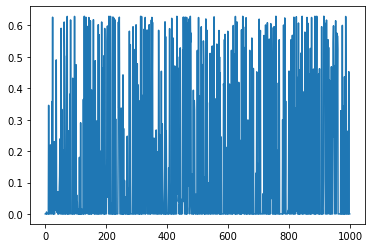

In [13]:
# plot the quantile function of the given distribution
# curve(qf(x, df1 = 10, df2 = 4))

from scipy.stats import f

dfn = 10
dfd = 4

plt.plot(f.pdf(x = x, dfn = dfn, dfd = dfd))
plt.show()

#### 13. F Distribution II

Let $Y\sim F(4,5)$.

**Instructions:**
  + Compute $P(1<Y<10)$ by integration of the PDF.

**Hints:**
  + Besides providing the function to be integrated, you have to specify lower and upper bounds of integration.
  + The additional parameters of the distribution (here <tt>df1</tt> and <tt>df2</tt>) also have to be passed *inside* the call of <tt>integrate()</tt>.
  + The value of the integral can be obtained via <tt>\\$value</tt>.

In [14]:
# compute the probability by integration

dfn = 4
dfd = 5

x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)

def function(x):
    return f.pdf(x = x, dfn = dfn, dfd = dfd)

integrate.quad(function, 1, 10)[0]

0.4723970230052129